# Apriori 알고리즘

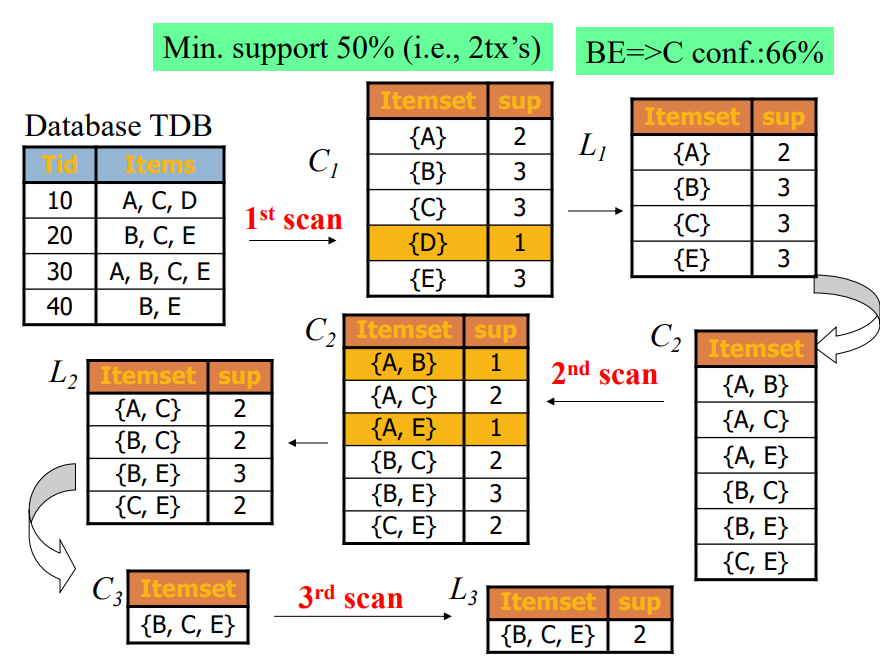

- L_k: 빈번한 k-항목 집합, 즉, k번째 반복에서 minsupport를 충족하는 빈번한 집합
- C_k: Database에서나, L_k에서 나올 수 있는 k-항목 집합, 즉, 후보 k-항목 집합, 가능한 빈번한 k-항목 집합

-----

- k-1 항목 집합을 사용하여 k 항목 집합 생성
- L[k-1]과 L[k-1]을 결합하여 C[k] 얻기
- 부분 집합 테스트를 사용하여 C[k] 정리
- MinSup을 만족하는 C[k]의 항목 집합을 추출하여 L[k] 생성

## 0. 데이터 셋 호출 및 전처리

### Case2. pands 이용해서 csv 댈꼬오기

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\is041\geon_hyeon\Git\Apriori\dataset\kaggle.csv', names = ['transactions'],sep = '\t')

# 위와 같이 한 셀에 들어있는 문자열을 컴마로 구분해서 한 글자씩 여러 행으로 나눌 계획이다.
df.head()

,transactions
0,"Lassi,Coffee Powder,Butter,Yougurt,Ghee,Cheese,"
1,"Ghee,Coffee Powder,"
2,"Lassi,Tea Powder,Butter,Cheese,"
3,"Cheese,Tea Powder,Panner,Coffee Powder,Butter,..."
4,"Cheese,Yougurt,Coffee Powder,Sugar,Butter,Sweet,"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12526 entries, 0 to 12525
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   transactions  12526 non-null  object
dtypes: object(1)
memory usage: 98.0+ KB


## 1. 간단한 전처리

In [3]:
itemSetList_pd = df['transactions'].str.split(',')

# 이후, Apriori Library 사용을 위해 List(List()) 형태로 변형
list_transactions = list(map(lambda x: x[:-1], itemSetList_pd))

itemSetList_pd.head()

0    [Lassi, Coffee Powder, Butter, Yougurt, Ghee, ...
1                              [Ghee, Coffee Powder, ]
2                [Lassi, Tea Powder, Butter, Cheese, ]
3    [Cheese, Tea Powder, Panner, Coffee Powder, Bu...
4    [Cheese, Yougurt, Coffee Powder, Sugar, Butter...
Name: transactions, dtype: object

In [4]:
# 배열이 Series를 리턴하게 apply를 적용하여 Series -> DataFrame으로 변환
itemSetList_pd = itemSetList_pd.apply(lambda x: pd.Series(x))

#  numpy로 ''값 NaN값으로 대채
itemSetList_pd = itemSetList_pd.replace('', np.NaN)

In [5]:
# stack()을 실행하여, 멀티 인덱스를 가진 Series로 변환
itemSetList_pd = itemSetList_pd.stack()

itemSetList_pd

0      0            Lassi
       1    Coffee Powder
       2           Butter
       3          Yougurt
       4             Ghee
                ...      
12524  3            Sugar
       4           Cheese
12525  0           Panner
       1          Yougurt
       2            Bread
Length: 65713, dtype: object

In [6]:
# 데이터 프레임 변경 후 items로 컬럼명 변경
itemSetList_pd = itemSetList_pd.to_frame('items')

In [7]:
itemSetList_pd

items
0     0          Lassi
      1  Coffee Powder
      2         Butter
      3        Yougurt
      4           Ghee
...                ...
12524 3          Sugar
      4         Cheese
12525 0         Panner
      1        Yougurt
      2          Bread

[65713 rows x 1 columns]

## 2. support 값 확인

In [8]:
support = (itemSetList_pd['items'].value_counts()/12526*100)

support.head()
# 항목별 support값 산출

Milk             44.116238
Ghee             43.988504
Coffee Powder    43.980521
Yougurt          43.932620
Bread            43.780936
Name: items, dtype: float64

## 3. 간단한 EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

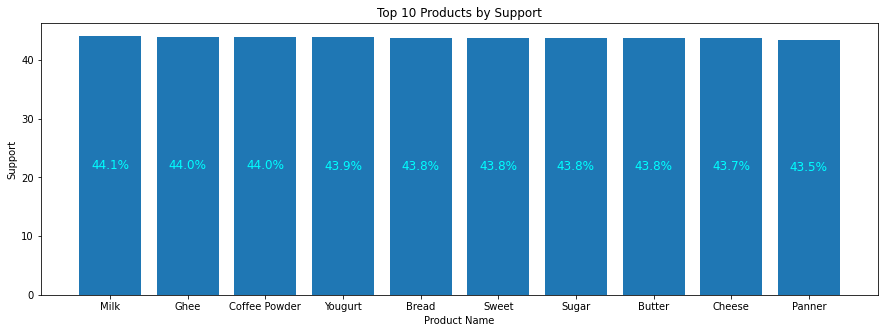

In [10]:
# support 값 Top 10 확인하기
plt.figure(figsize = (15,5))
bars = plt.bar(x = np.arange(len(support.head(10))), height = (support).head(10))
plt.bar_label(bars, fontsize=12, color='cyan', fmt = '%2.1f%%', label_type = 'center')
plt.xticks(ticks = np.arange(len(support.head(10))), labels = support.index[:10])

plt.title('Top 10 Products by Support')
plt.ylabel('Support')
plt.xlabel('Product Name')
plt.show()

## Apriori Library로 간단하게 구현하기

!pip install apyori

In [11]:
from apyori import apriori

In [13]:
list_transactions[:10]

[['Lassi', 'Coffee Powder', 'Butter', 'Yougurt', 'Ghee', 'Cheese'],
 ['Ghee', 'Coffee Powder'],
 ['Lassi', 'Tea Powder', 'Butter', 'Cheese'],
 ['Cheese', 'Tea Powder', 'Panner', 'Coffee Powder', 'Butter', 'Bread'],
 ['Cheese', 'Yougurt', 'Coffee Powder', 'Sugar', 'Butter', 'Sweet'],
 ['Sugar', 'Tea Powder', 'Ghee', 'Sweet', 'Panner', 'Milk'],
 ['Sweet', 'Coffee Powder'],
 ['Butter', 'Ghee', 'Panner'],
 ['Sweet', 'Tea Powder', 'Butter', 'Yougurt', 'Sugar', 'Cheese'],
 ['Panner', 'Ghee']]

In [23]:
# 연관 규칙 분석 Rules 적용 <- 즉, 하이퍼파라메터 지정
# min_support = 0.001, min_confidence = 0.05, min_lift = 1.05, max_length = 2 
# <- min_lift 값을 왜 이렇게 낮춰야 되는거지??
rules = apriori(list_transactions, min_support = 0.001, min_confidence = 0.05, min_lift = 1.05, max_length = 2)

results = list(rules)

In [24]:
print(results)

[RelationRecord(items=frozenset({'Bread', 'Cheese'}), support=0.20197988184576082, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Bread'}), items_add=frozenset({'Cheese'}), confidence=0.4613420860685631, lift=1.0552905350794048), OrderedStatistic(items_base=frozenset({'Cheese'}), items_add=frozenset({'Bread'}), confidence=0.4620160701241783, lift=1.055290535079405)]), RelationRecord(items=frozenset({'Bread', 'Lassi'}), support=0.20006386715631486, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Bread'}), items_add=frozenset({'Lassi'}), confidence=0.4569657184536834, lift=1.0537467947994916), OrderedStatistic(items_base=frozenset({'Lassi'}), items_add=frozenset({'Bread'}), confidence=0.46134020618556704, lift=1.0537467947994916)]), RelationRecord(items=frozenset({'Bread', 'Panner'}), support=0.20357656075363245, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Bread'}), items_add=frozenset({'Panner'}), confidence=0.46498905908096283, lift=1.0698848188

In [25]:
# 새로운 데이터 프레임 생성한 이후 규칙 계산
pd.options.display.float_format = '{:,.2f}'.format
final_df = pd.DataFrame(columns = ['Left Hand Side', 'Right Hand Side', 'Support(%)', 'Confidence(%)', 'Lift'])

for i in results:
    if len(i[0]) > 1:
        for j in range(0, len(i[2])):
            LHS = list(i[2][j][0])[0]
            RHS = list(i[2][j][1])[0]
            SUPPORT = i[1]*100
            CONFIDENCE = i[2][j][2]*100
            LIFT = i[2][j][3]
            new_row = {'Left Hand Side': LHS, 'Right Hand Side': RHS, 'Support(%)': SUPPORT, 'Confidence(%)': CONFIDENCE, 'Lift': LIFT}
            final_df = final_df.append(new_row, ignore_index = True)
            
final_df['Rules'] = final_df['Left Hand Side'] + ' -> ' + final_df['Right Hand Side']

print('Number of Rules: ', final_df['Rules'].count(), 'Rules')

final_df.head()

Number of Rules:  48 Rules


,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rules
0,Bread,Cheese,20.20,46.13,1.06,Bread -> Cheese
1,Cheese,Bread,20.20,46.20,1.06,Cheese -> Bread
2,Bread,Lassi,20.01,45.70,1.05,Bread -> Lassi
3,Lassi,Bread,20.01,46.13,1.05,Lassi -> Bread
4,Bread,Panner,20.36,46.50,1.07,Bread -> Panner


## 시각화

Text(0.5, 1.0, 'Scatter Plot of Rules By Support, Confidence and Lift')

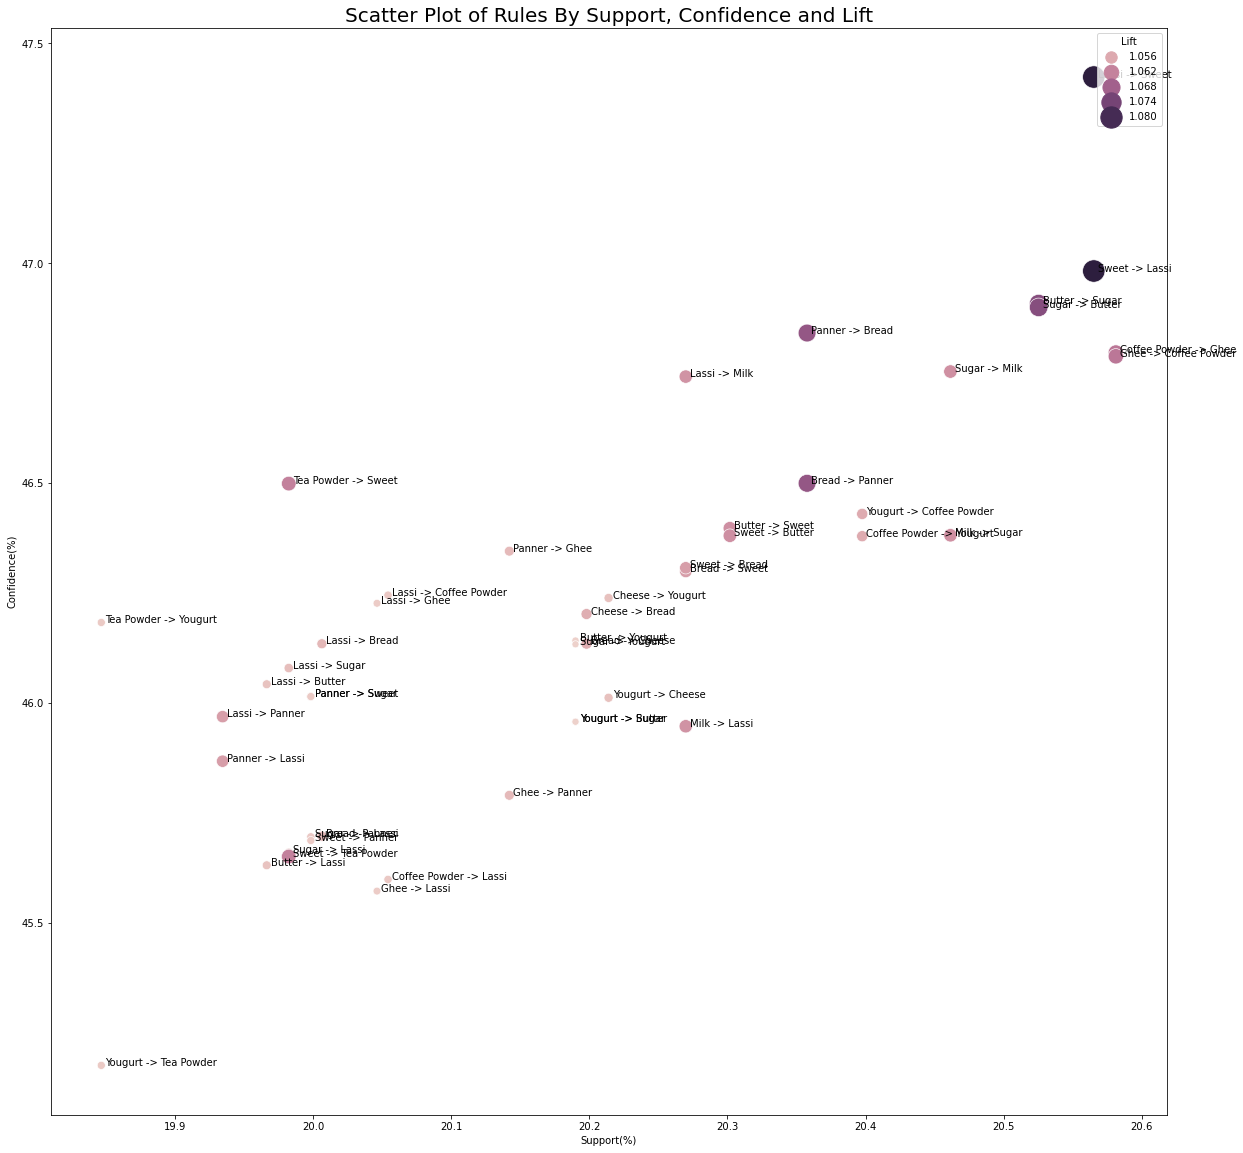

In [26]:
# Plotting support, confidence and lift of rules
plt.figure(figsize = (20,20))
support = final_df['Support(%)']
confidence = final_df['Confidence(%)']
rule = final_df['Rules']
ax = sns.scatterplot(data = final_df, x = 'Support(%)', y = 'Confidence(%)', hue = 'Lift', size = 'Lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (support[i] + 0.003, confidence[i] ))

plt.title('Scatter Plot of Rules By Support, Confidence and Lift', fontsize = 20)